In [1]:
import re
import pandas as pd

In [2]:
f = open('Whatsapp Chat with Barsha.txt','r', encoding ='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

2/18/22, 7:30 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
2/18/22, 7:30 PM - Irfanul Kabir Hira: Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne parbo ami bhai😭😭amr nijer bhon haraici mne hocce,bhai ami parteci nah,jah hbe dekha jabe🙂🙂...amr possible hocce nah, nah parteci porte nah parteci assignment korte, jotodin nah tui ignore korbi,Barsha k amr lagbei😶😶😶 eto gula frndz karro kotha 2 mint er jonno porjonto mathai ashlo nah bhai😶😶😶.tor kothai astece khali😭(6-7 mash kotha nah bolle kono problem nai bhai,oi  rkm bolclm to amra naki bli nai bol!!! last year e to emn onk time gece 4-5 mash kothai bli nai😭😭 but ekabre kotha bolbo nah ble j ber hoi ashlam sheta ami nite parteci nah😭😭😭😭
2/18/22, 8:01 PM - Barsha: Bujhlam na
2/18/22, 8:01 PM - Barsha: Ki korbo?
2/18/22, 8:02 PM - Barsha: Kotha na bole thakte partesos na j? Naki  kotha bola bondho korte parbi na?
2/18/22, 8:02 PM - Barsha: Konta?

In [5]:
pattern ='^\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?(?:AM|PM|am|pm) - [^:]+: .+$'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hirak\AppData\Local\Temp\ipykernel_10452\3480861383.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern ='^\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?(?:AM|PM|am|pm) - [^:]+: .+$'


In [6]:
messages = re.findall(pattern, data, re.MULTILINE)


In [7]:
parsed_data = []
for message in messages:
    match = re.match(r'^(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}\s?(?:AM|PM|am|pm)) - ([^:]+): (.+)$', message)
    if match:
        parsed_data.append(match.groups())


In [8]:
# Step 6: Create DataFrame
df = pd.DataFrame(parsed_data, columns=['Date', 'Time', 'Name', 'Message'])

In [9]:
df.head()

Date     Time                Name  \
0  2/18/22  7:30 PM  Irfanul Kabir Hira   
1  2/18/22  8:01 PM              Barsha   
2  2/18/22  8:01 PM              Barsha   
3  2/18/22  8:02 PM              Barsha   
4  2/18/22  8:02 PM              Barsha   

                                             Message  
0  Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne pa...  
1                                         Bujhlam na  
2                                          Ki korbo?  
3  Kotha na bole thakte partesos na j? Naki  koth...  
4                                             Konta?

In [10]:
df.shape #existing text 

(17667, 4)

In [11]:
# Assuming df is your DataFrame and 'Date' column is in the format MM/DD/YY
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Optionally, print the DataFrame to verify
print(df.head())

        Date     Time                Name  \
0 2022-02-18  7:30 PM  Irfanul Kabir Hira   
1 2022-02-18  8:01 PM              Barsha   
2 2022-02-18  8:01 PM              Barsha   
3 2022-02-18  8:02 PM              Barsha   
4 2022-02-18  8:02 PM              Barsha   

                                             Message  Year  
0  Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne pa...  2022  
1                                         Bujhlam na  2022  
2                                          Ki korbo?  2022  
3  Kotha na bole thakte partesos na j? Naki  koth...  2022  
4                                             Konta?  2022  


In [12]:
df.head()

Date     Time                Name  \
0 2022-02-18  7:30 PM  Irfanul Kabir Hira   
1 2022-02-18  8:01 PM              Barsha   
2 2022-02-18  8:01 PM              Barsha   
3 2022-02-18  8:02 PM              Barsha   
4 2022-02-18  8:02 PM              Barsha   

                                             Message  Year  
0  Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne pa...  2022  
1                                         Bujhlam na  2022  
2                                          Ki korbo?  2022  
3  Kotha na bole thakte partesos na j? Naki  koth...  2022  
4                                             Konta?  2022

In [13]:
df['month']=df['Date'].dt.month_name()

In [14]:
df['day'] =df['Date'].dt.day

In [15]:
df['Hour'] =df['Date'].dt.hour

In [16]:
df['Minute'] =df['Date'].dt.minute

In [17]:
df.head()

Date     Time                Name  \
0 2022-02-18  7:30 PM  Irfanul Kabir Hira   
1 2022-02-18  8:01 PM              Barsha   
2 2022-02-18  8:01 PM              Barsha   
3 2022-02-18  8:02 PM              Barsha   
4 2022-02-18  8:02 PM              Barsha   

                                             Message  Year     month  day  \
0  Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne pa...  2022  February   18   
1                                         Bujhlam na  2022  February   18   
2                                          Ki korbo?  2022  February   18   
3  Kotha na bole thakte partesos na j? Naki  koth...  2022  February   18   
4                                             Konta?  2022  February   18   

   Hour  Minute  
0     0       0  
1     0       0  
2     0       0  
3     0       0  
4     0       0

In [18]:
df[df['Name'] == 'Irfanul Kabir Hira']

Date      Time                Name  \
0     2022-02-18   7:30 PM  Irfanul Kabir Hira   
10    2022-02-18   8:10 PM  Irfanul Kabir Hira   
11    2022-02-18   8:11 PM  Irfanul Kabir Hira   
12    2022-02-18   8:11 PM  Irfanul Kabir Hira   
13    2022-02-18   8:29 PM  Irfanul Kabir Hira   
...          ...       ...                 ...   
17659 2023-12-10   7:54 PM  Irfanul Kabir Hira   
17661 2023-12-11   5:17 AM  Irfanul Kabir Hira   
17662 2024-01-01   1:58 AM  Irfanul Kabir Hira   
17664 2024-01-01  10:04 PM  Irfanul Kabir Hira   
17665 2024-08-06   9:49 PM  Irfanul Kabir Hira   

                                                 Message  Year     month  day  \
0      Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne pa...  2022  February   18   
10     Kotha bla bondho ami korte parbo nah😭😭..ami pa...  2022  February   18   
11               Ami bhai ghum o ashe nah kichu ashe nah  2022  February   18   
12                                    Korbo ta ki ami😭😭😭  2022  February   18   
13     Amr gunah hoile hok, amr dost to k lagbei, all...  2022  February   18   
...                                                  ...   ...       ...  ...   
17659  bhai Mirpur a chilam j tokhn amdr varsity er M...  2023  December   10   
17661                           Amr o tai mne hocce Bedi  2023  December   11   
17662                              Happy new year Barsha  2024   January    1   
17664  Shun amr upor khob tob rhakis nah bhaiii, Tobu...  2024   January    1   
17665                                    <Media omitted>  2024    August    6   

       Hour  Minute  
0         0       0  
10        0       0  
11        0       0  
12        0       0  
13        0       0  
...     ...     ...  
17659     0       0  
17661     0       0  
17662     0       0  
17664     0       0  
17665     0       0  

[11321 rows x 9 columns]

In [21]:
df[df['Name'] == 'Irfanul Kabir Hira'].shape

(11321, 9)

In [19]:
df[df['Name'] == 'Barsha']

Date      Time    Name  \
1     2022-02-18   8:01 PM  Barsha   
2     2022-02-18   8:01 PM  Barsha   
3     2022-02-18   8:02 PM  Barsha   
4     2022-02-18   8:02 PM  Barsha   
5     2022-02-18   8:02 PM  Barsha   
...          ...       ...     ...   
17654 2023-12-10   9:03 AM  Barsha   
17658 2023-12-10   6:10 PM  Barsha   
17660 2023-12-10   9:08 PM  Barsha   
17663 2024-01-01  12:29 PM  Barsha   
17666 2024-08-07   5:15 PM  Barsha   

                                                 Message  Year     month  day  \
1                                             Bujhlam na  2022  February   18   
2                                              Ki korbo?  2022  February   18   
3      Kotha na bole thakte partesos na j? Naki  koth...  2022  February   18   
4                                                 Konta?  2022  February   18   
5               Ami kalke kothar shathe kotha boltesilam  2022  February   18   
...                                                  ...   ...       ...  ...   
17654  Ami limit er baire giye friend der shatheo kot...  2023  December   10   
17658                                            Bujhchi  2023  December   10   
17660                          Metro chalu korsei ejonno  2023  December   10   
17663                                  Happy new year ❤️  2024   January    1   
17666                                   beyadob kotogula  2024    August    7   

       Hour  Minute  
1         0       0  
2         0       0  
3         0       0  
4         0       0  
5         0       0  
...     ...     ...  
17654     0       0  
17658     0       0  
17660     0       0  
17663     0       0  
17666     0       0  

[6346 rows x 9 columns]

In [20]:
df[df['Name'] == 'Barsha'].shape

(6346, 9)

In [24]:
#Total Number of Words 
for Message in df['Message']:
    print(Message)

Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne parbo ami bhai😭😭amr nijer bhon haraici mne hocce,bhai ami parteci nah,jah hbe dekha jabe🙂🙂...amr possible hocce nah, nah parteci porte nah parteci assignment korte, jotodin nah tui ignore korbi,Barsha k amr lagbei😶😶😶 eto gula frndz karro kotha 2 mint er jonno porjonto mathai ashlo nah bhai😶😶😶.tor kothai astece khali😭(6-7 mash kotha nah bolle kono problem nai bhai,oi  rkm bolclm to amra naki bli nai bol!!! last year e to emn onk time gece 4-5 mash kothai bli nai😭😭 but ekabre kotha bolbo nah ble j ber hoi ashlam sheta ami nite parteci nah😭😭😭😭
Bujhlam na
Ki korbo?
Kotha na bole thakte partesos na j? Naki  kotha bola bondho korte parbi na?
Konta?
Ami kalke kothar shathe kotha boltesilam
I cried for almost 1 hour
O amake shantona dicchilo
She has this believe j amra ager moto thakbo
Amra means tui ar Ami ar ki
Kotha bla bondho ami korte parbo nah😭😭..ami parteci nah bhai...tor sathe friendship bhangte ami parbo nah...problem hoi nai kichu hoi nai a

In [25]:
#Total Number of Words 
for Message in df['Message']:
    print(Message.split())

['Ami', 'kemne', 'parbo', 'bhai🙂🙂🙂🙂,..to', 'k', 'chara', 'kemne', 'parbo', 'ami', 'bhai😭😭amr', 'nijer', 'bhon', 'haraici', 'mne', 'hocce,bhai', 'ami', 'parteci', 'nah,jah', 'hbe', 'dekha', 'jabe🙂🙂...amr', 'possible', 'hocce', 'nah,', 'nah', 'parteci', 'porte', 'nah', 'parteci', 'assignment', 'korte,', 'jotodin', 'nah', 'tui', 'ignore', 'korbi,Barsha', 'k', 'amr', 'lagbei😶😶😶', 'eto', 'gula', 'frndz', 'karro', 'kotha', '2', 'mint', 'er', 'jonno', 'porjonto', 'mathai', 'ashlo', 'nah', 'bhai😶😶😶.tor', 'kothai', 'astece', 'khali😭(6-7', 'mash', 'kotha', 'nah', 'bolle', 'kono', 'problem', 'nai', 'bhai,oi', 'rkm', 'bolclm', 'to', 'amra', 'naki', 'bli', 'nai', 'bol!!!', 'last', 'year', 'e', 'to', 'emn', 'onk', 'time', 'gece', '4-5', 'mash', 'kothai', 'bli', 'nai😭😭', 'but', 'ekabre', 'kotha', 'bolbo', 'nah', 'ble', 'j', 'ber', 'hoi', 'ashlam', 'sheta', 'ami', 'nite', 'parteci', 'nah😭😭😭😭']
['Bujhlam', 'na']
['Ki', 'korbo?']
['Kotha', 'na', 'bole', 'thakte', 'partesos', 'na', 'j?', 'Naki', 'kotha',

In [28]:
#Total Number of Words 
words =[]
for Message in df['Message']:
    words.extend(Message.split())

In [29]:
len(words)

82216

In [30]:
emoji_pattern = re.compile(
    '['
    u'\U0001F600-\U0001F64F'  # emoticons
    u'\U0001F300-\U0001F5FF'  # symbols & pictographs
    u'\U0001F680-\U0001F6FF'  # transport & map symbols
    u'\U0001F700-\U0001F77F'  # alchemical symbols
    u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
    u'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
    u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
    u'\U0001FA00-\U0001FA6F'  # Chess Symbols
    u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
    u'\U00002700-\U000027BF'  # Dingbats
    u'\U000024C2-\U0001F251'  # Enclosed Alphanumeric Supplement
    ']+', flags=re.UNICODE)

# Function to count emojis in a message
def count_emojis(message):
    return len(emoji_pattern.findall(message))

# Apply the function to the 'Message' column and create a new column for emoji count
df['Emoji Count'] = df['Message'].apply(count_emojis)

# Group by 'Name' to get total emoji count per person
emoji_counts = df.groupby('Name')['Emoji Count'].sum().reset_index()

# Print the result
print(emoji_counts)

                 Name  Emoji Count
0              Barsha          291
1  Irfanul Kabir Hira         1786


In [51]:
url_pattern = re.compile(r'https?://[^\s]+', re.IGNORECASE)

# Function to extract URLs from a message
def extract_urls(message):
    return url_pattern.findall(message)

# Apply the function to the 'Message' column and collect all URLs
all_urls = df['Message'].apply(extract_urls)

# Flatten the list of lists of URLs into a single list
urls_list = [url for sublist in all_urls for url in sublist]

# Create a DataFrame of unique URLs
urls_df = pd.DataFrame(urls_list, columns=['URL']).drop_duplicates()

# Optionally, print the DataFrame of unique URLs
print(urls_df)

                                                  URL
0                        https://youtu.be/HVURyhVP_Ak
1   https://www.facebook.com/Meme.Bashaboo/videos/...
2                        https://fb.watch/bTwc6Oks8g/
3   https://www.facebook.com/107832550806257/posts...
4   https://www.facebook.com/Heybroclub/videos/107...
5   https://www.facebook.com/100036274174439/posts...
6   https://www.facebook.com/100009147916338/posts...
7                        https://fb.watch/d_i3yfYmnF/
8                        https://youtu.be/l2Pc10FFxKg
9   https://www.facebook.com/100009147916338/posts...
10  https://www.facebook.com/100075934983951/posts...
11  https://www.facebook.com/100009147916338/posts...
12                       https://youtu.be/tAJQnnGqAW4
13  https://www.facebook.com/groups/TheSparrows.Gr...
14                    https://youtu.be/oGDg9pLKPs8...
15              https://www.facebook.com/tawhid.anwar
16                       https://youtu.be/rfoeuCjxSZo
17                       htt

In [52]:
df

Date      Time                Name  \
0     2022-02-18   7:30 PM  Irfanul Kabir Hira   
1     2022-02-18   8:01 PM              Barsha   
2     2022-02-18   8:01 PM              Barsha   
3     2022-02-18   8:02 PM              Barsha   
4     2022-02-18   8:02 PM              Barsha   
...          ...       ...                 ...   
17662 2024-01-01   1:58 AM  Irfanul Kabir Hira   
17663 2024-01-01  12:29 PM              Barsha   
17664 2024-01-01  10:04 PM  Irfanul Kabir Hira   
17665 2024-08-06   9:49 PM  Irfanul Kabir Hira   
17666 2024-08-07   5:15 PM              Barsha   

                                                 Message  Year     month  day  \
0      Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne pa...  2022  February   18   
1                                             Bujhlam na  2022  February   18   
2                                              Ki korbo?  2022  February   18   
3      Kotha na bole thakte partesos na j? Naki  koth...  2022  February   18   
4                                                 Konta?  2022  February   18   
...                                                  ...   ...       ...  ...   
17662                              Happy new year Barsha  2024   January    1   
17663                                  Happy new year ❤️  2024   January    1   
17664  Shun amr upor khob tob rhakis nah bhaiii, Tobu...  2024   January    1   
17665                                    <Media omitted>  2024    August    6   
17666                                   beyadob kotogula  2024    August    7   

       Hour  Minute  Emoji Count URLs  
0         0       0            8   []  
1         0       0            0   []  
2         0       0            0   []  
3         0       0            0   []  
4         0       0            0   []  
...     ...     ...          ...  ...  
17662     0       0            0   []  
17663     0       0            1   []  
17664     0       0            0   []  
17665     0       0            0   []  
17666     0       0            0   []  

[17667 rows x 11 columns]

In [54]:
#Top Users
df['Name'].value_counts()

Name
Irfanul Kabir Hira    11321
Barsha                 6346
Name: count, dtype: int64

In [57]:
#Top 5 users
x = df['Name'].value_counts().head()

In [58]:
# Ploting a graph
import matplotlib.pyplot as plt

In [59]:
name =x.index
count =x.values

<BarContainer object of 2 artists>

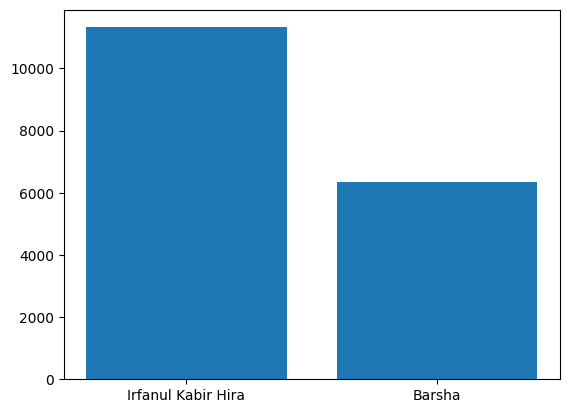

In [60]:
plt.bar(name,count)

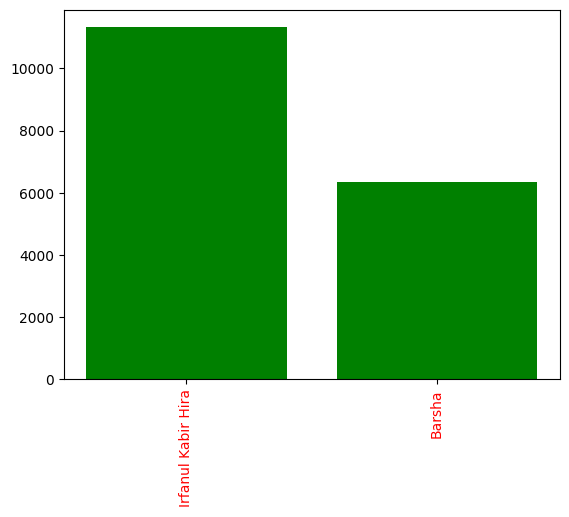

In [65]:
plt.bar(name,count,color ='green' )
plt.xticks(rotation='vertical' , color ='red')
plt.show()

In [66]:
# Each users Percantege of Messages

round((df['Name'].value_counts()/df.shape[0])*100,2)

Name
Irfanul Kabir Hira    64.08
Barsha                35.92
Name: count, dtype: float64

In [68]:
# Each users Percantege of Messages --> Reset kore Data fram e convert korlam 

round((df['Name'].value_counts()/df.shape[0])*100,2).reset_index()

Name  count
0  Irfanul Kabir Hira  64.08
1              Barsha  35.92

In [71]:
# Rename korbo 
round((df['Name'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns ={'Name':'Name of Messager' , 'count':'percent'})

Name of Messager  percent
0  Irfanul Kabir Hira    64.08
1              Barsha    35.92

In [75]:
# Most uses Words
words=[]
for Message in df['Message']:
    print (Message)

Ami kemne parbo bhai🙂🙂🙂🙂,..to k chara kemne parbo ami bhai😭😭amr nijer bhon haraici mne hocce,bhai ami parteci nah,jah hbe dekha jabe🙂🙂...amr possible hocce nah, nah parteci porte nah parteci assignment korte, jotodin nah tui ignore korbi,Barsha k amr lagbei😶😶😶 eto gula frndz karro kotha 2 mint er jonno porjonto mathai ashlo nah bhai😶😶😶.tor kothai astece khali😭(6-7 mash kotha nah bolle kono problem nai bhai,oi  rkm bolclm to amra naki bli nai bol!!! last year e to emn onk time gece 4-5 mash kothai bli nai😭😭 but ekabre kotha bolbo nah ble j ber hoi ashlam sheta ami nite parteci nah😭😭😭😭
Bujhlam na
Ki korbo?
Kotha na bole thakte partesos na j? Naki  kotha bola bondho korte parbi na?
Konta?
Ami kalke kothar shathe kotha boltesilam
I cried for almost 1 hour
O amake shantona dicchilo
She has this believe j amra ager moto thakbo
Amra means tui ar Ami ar ki
Kotha bla bondho ami korte parbo nah😭😭..ami parteci nah bhai...tor sathe friendship bhangte ami parbo nah...problem hoi nai kichu hoi nai a

In [76]:
# Most uses Words
words=[]
for Message in df['Message']:
    print (Message.split())

['Ami', 'kemne', 'parbo', 'bhai🙂🙂🙂🙂,..to', 'k', 'chara', 'kemne', 'parbo', 'ami', 'bhai😭😭amr', 'nijer', 'bhon', 'haraici', 'mne', 'hocce,bhai', 'ami', 'parteci', 'nah,jah', 'hbe', 'dekha', 'jabe🙂🙂...amr', 'possible', 'hocce', 'nah,', 'nah', 'parteci', 'porte', 'nah', 'parteci', 'assignment', 'korte,', 'jotodin', 'nah', 'tui', 'ignore', 'korbi,Barsha', 'k', 'amr', 'lagbei😶😶😶', 'eto', 'gula', 'frndz', 'karro', 'kotha', '2', 'mint', 'er', 'jonno', 'porjonto', 'mathai', 'ashlo', 'nah', 'bhai😶😶😶.tor', 'kothai', 'astece', 'khali😭(6-7', 'mash', 'kotha', 'nah', 'bolle', 'kono', 'problem', 'nai', 'bhai,oi', 'rkm', 'bolclm', 'to', 'amra', 'naki', 'bli', 'nai', 'bol!!!', 'last', 'year', 'e', 'to', 'emn', 'onk', 'time', 'gece', '4-5', 'mash', 'kothai', 'bli', 'nai😭😭', 'but', 'ekabre', 'kotha', 'bolbo', 'nah', 'ble', 'j', 'ber', 'hoi', 'ashlam', 'sheta', 'ami', 'nite', 'parteci', 'nah😭😭😭😭']
['Bujhlam', 'na']
['Ki', 'korbo?']
['Kotha', 'na', 'bole', 'thakte', 'partesos', 'na', 'j?', 'Naki', 'kotha',

In [82]:
# Most uses Words
words=[]
for Message in df['Message']:
    words.extend(Message.split())
    

In [83]:
words

['Ami',
 'kemne',
 'parbo',
 'bhai🙂🙂🙂🙂,..to',
 'k',
 'chara',
 'kemne',
 'parbo',
 'ami',
 'bhai😭😭amr',
 'nijer',
 'bhon',
 'haraici',
 'mne',
 'hocce,bhai',
 'ami',
 'parteci',
 'nah,jah',
 'hbe',
 'dekha',
 'jabe🙂🙂...amr',
 'possible',
 'hocce',
 'nah,',
 'nah',
 'parteci',
 'porte',
 'nah',
 'parteci',
 'assignment',
 'korte,',
 'jotodin',
 'nah',
 'tui',
 'ignore',
 'korbi,Barsha',
 'k',
 'amr',
 'lagbei😶😶😶',
 'eto',
 'gula',
 'frndz',
 'karro',
 'kotha',
 '2',
 'mint',
 'er',
 'jonno',
 'porjonto',
 'mathai',
 'ashlo',
 'nah',
 'bhai😶😶😶.tor',
 'kothai',
 'astece',
 'khali😭(6-7',
 'mash',
 'kotha',
 'nah',
 'bolle',
 'kono',
 'problem',
 'nai',
 'bhai,oi',
 'rkm',
 'bolclm',
 'to',
 'amra',
 'naki',
 'bli',
 'nai',
 'bol!!!',
 'last',
 'year',
 'e',
 'to',
 'emn',
 'onk',
 'time',
 'gece',
 '4-5',
 'mash',
 'kothai',
 'bli',
 'nai😭😭',
 'but',
 'ekabre',
 'kotha',
 'bolbo',
 'nah',
 'ble',
 'j',
 'ber',
 'hoi',
 'ashlam',
 'sheta',
 'ami',
 'nite',
 'parteci',
 'nah😭😭😭😭',
 'Bujhlam'

In [84]:
# Each words how many times came

from collections import Counter
Counter(words)

Counter({'nah': 1168,
         'to': 1142,
         'k': 1032,
         'na': 983,
         'Ami': 925,
         'ki': 918,
         'e': 899,
         'ami': 756,
         'XD': 752,
         'er': 709,
         'o': 575,
         'nai': 540,
         'kotha': 537,
         'j': 518,
         'Tui': 516,
         'kore': 488,
         'tui': 486,
         '<Media': 472,
         'omitted>': 472,
         'ta': 465,
         'But': 445,
         'bhai': 441,
         'tor': 429,
         'r': 399,
         'amr': 377,
         'R': 360,
         'Tor': 335,
         'Bhai': 334,
         'kichu': 330,
         'theke': 326,
         'this': 325,
         'message': 322,
         'deleted': 320,
         'You': 300,
         'Amar': 297,
         'ekta': 288,
         'Ha': 278,
         'vlo': 277,
         'Amr': 272,
         'kno': 246,
         'Acca': 246,
         'te': 242,
         'onk': 223,
         'hoi': 223,
         'din': 223,
         'ace': 220,
         'nie': 220,
 

In [85]:
# Most Common 2o Words

from collections import Counter
Counter(words).most_common(20)

[('nah', 1168),
 ('to', 1142),
 ('k', 1032),
 ('na', 983),
 ('Ami', 925),
 ('ki', 918),
 ('e', 899),
 ('ami', 756),
 ('XD', 752),
 ('er', 709),
 ('o', 575),
 ('nai', 540),
 ('kotha', 537),
 ('j', 518),
 ('Tui', 516),
 ('kore', 488),
 ('tui', 486),
 ('<Media', 472),
 ('omitted>', 472),
 ('ta', 465)]

In [87]:
# Converting this into a Data fram 

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

0     1
0        nah  1168
1         to  1142
2          k  1032
3         na   983
4        Ami   925
5         ki   918
6          e   899
7        ami   756
8         XD   752
9         er   709
10         o   575
11       nai   540
12     kotha   537
13         j   518
14       Tui   516
15      kore   488
16       tui   486
17    <Media   472
18  omitted>   472
19        ta   465

In [ ]:
# Removing Group Natificaiton 
# Remove Media omitted Message
#Remove Stop Words

In [ ]:
# Emoji Enalysis


In [106]:
# Time Analysis
df['month_num'] =df['Date'].dt.month

KeyError: 'Date'